# Corpus Analysis (Leistungsnachweis)

Group member: (Last name, First name)

**Brahushi, Delian**

The chosen language for the corpus is **Italian**.

The name of the corpus text file is "***ita_news_2023_1M-sentences.txt***". The corpus is freely accessible from the Wortschatz Leipzig link : https://wortschatz.uni-leipzig.de/en/download/Italian . The chosen corpus is the 2023 version of the news with 1 million sentences.

# Solution of the tasks

### **Task 1 - Installing needed packages**


In [ ]:
!pip install nltk matplotlib wordcloud

### **Task 2 - Installing other neccessary packages / libraries**

In [ ]:
import nltk
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

!pip install wordsegment
!pip install spacy
!python -m spacy download it_core_news_sm

### **Task 3 - Loading the Corpus**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define the file path
file_path = '/content/drive/My Drive/ita_news_2023_1M-sentences.txt'

# Load and read the text file
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Sample print to check the file content
print(text[:500])  # Print the first 500 characters

1	$RBLZ ha un’ di 250 milioni, fatto che equivale a una tokenomica favorevole e impedisce l’inflazione.
2	€ 132.000,00 in favore dei disabili gravi, per la realizzazione degli interventi previsti alla lettera c) del disciplinare approvato con la DGR.
3	€ 171.127 di sovvenzioni attraverso il Fondo 394/81 erogate dalla SIMEST SPA.
4	€ 18,90 per sette fette di formaggio?
5	€5 su prenotazione o fino a esaurimento posti più acquisto del biglietto di ingresso ridotto al Museo.
6	€ partito da Milano il


#### **Task 3.1 - Preprocessing the Corpus**

The Corpus contains characters that are non-relevant for the analysis such as currency, numbers and others. Also each line has a number in the start of the sentences which are non useful, therefore we must get rid of them.

In [ ]:
import re

# Define input and output file paths
input_file_path = '/content/drive/My Drive/ita_news_2023_1M-sentences.txt'
output_file_path = '/content/drive/My Drive/ita_news_processed.txt'

# Read the original file, remove line numbers, non-Italian alphabet characters, and numbers
with open(input_file_path, 'r', encoding='utf-8') as infile:
    text = infile.read()

# Remove line numbers
text = re.sub(r'^\d+\t', '', text, flags=re.MULTILINE)

# Remove non-Italian alphabet characters and numbers
text = re.sub(r'[^a-zA-Zàèéìíîòóùú\s]', ' ', text)

# Save the processed text to a new file
with open(output_file_path, 'w', encoding='utf-8') as outfile:
    outfile.write(text)

#### **Task 3.2 - Checking if the preprocessing is done properly**

In [ ]:
# Print the first 500 characters
print("First 500 characters:")
print(text[:500])

# Print the last 500 characters
print("\nLast 500 characters:")
print(text[-500:])

First 500 characters:
 RBLZ ha un  di     milioni  fatto che equivale a una tokenomica favorevole e impedisce l inflazione 
             in favore dei disabili gravi  per la realizzazione degli interventi previsti alla lettera c  del disciplinare approvato con la DGR 
          di sovvenzioni attraverso il Fondo        erogate dalla SIMEST SPA 
        per sette fette di formaggio 
   su prenotazione o fino a esaurimento posti più acquisto del biglietto di ingresso ridotto al Museo 
  partito da Milano il       ottob

Last 500 characters:
  mentre quasi       sono i partner certificati suddivisi nei livelli Ally  Silver e Gold 
       Eremìa lo vede cantare in calabrese  in greco  in arabo  fra suoni della tradizione e innovazioni 
  stato molto gentile perché è sceso con me e abbiamo fatto insieme l ultimo tratto 
  una vergogna ma che cosa insegniamo ai nostri figli 
  un occasione storica e una grande battaglia per la governance  
   Mi tratti di me   anche se io cerco di avere un r

### **Task 4 - Calculating the lexical richness**

In [ ]:
# Tokenize the text
tokens = nltk.word_tokenize(text, language='italian')

# Calculate lexical richness
unique_tokens = set(tokens)
lexical_richness = len(unique_tokens) / len(tokens)

print(f'Lexical Richness (Type-Token Ratio): {lexical_richness:.2f}')

Lexical Richness (Type-Token Ratio): 0.01


### **Task 5 - Plotting the character distribution**

The most common characters in the Corpus are : [('a', 11224554), ('i', 11209533), ('e', 11125993), ('o', 9173378), ('n', 7360915), ('t', 6888556)]


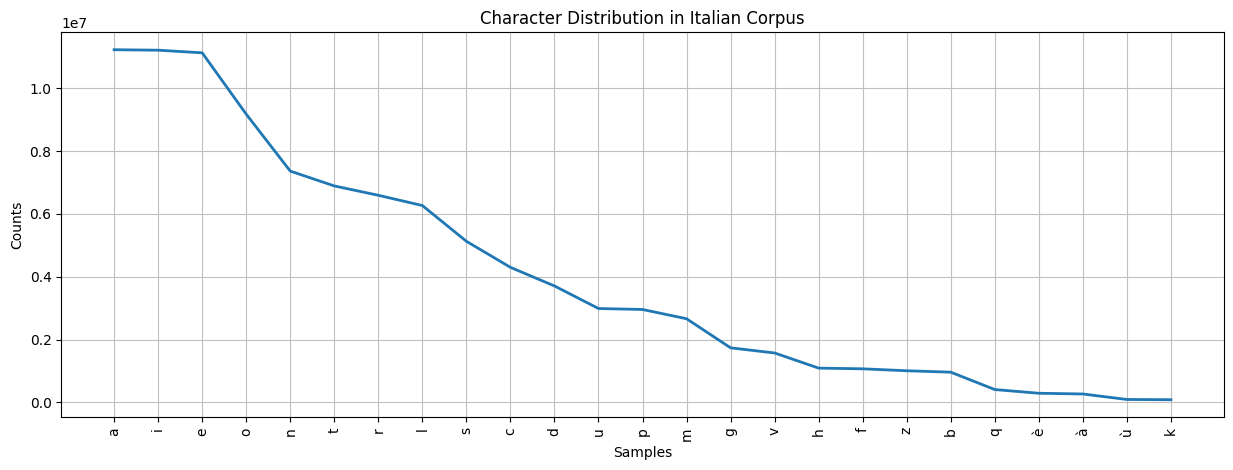

<Axes: title={'center': 'Character Distribution in Italian Corpus'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Count character frequencies
fdist = nltk.FreqDist(ch.lower() for ch in text if ch.isalpha())

# Print the 25 most common characters
print(f"The most common characters in the Corpus are : {fdist.most_common(6)}")

# Plot the character distribution
plt.figure(figsize=(15, 5))
fdist.plot(25, title='Character Distribution in Italian Corpus')

### **Task 6 - Plotting the word distribution with stopwords**

The most common words in the Corpus are: [('di', 770120), ('e', 473667), ('che', 354278), ('il', 348609), ('la', 332620), ('in', 300016), ('a', 285711), ('è', 281306), ('per', 265178), ('un', 261974), ('del', 198998), ('l', 173807), ('con', 163569), ('una', 156054), ('ha', 152800), ('della', 151095), ('non', 147166), ('i', 146209), ('le', 141055), ('si', 132571)]


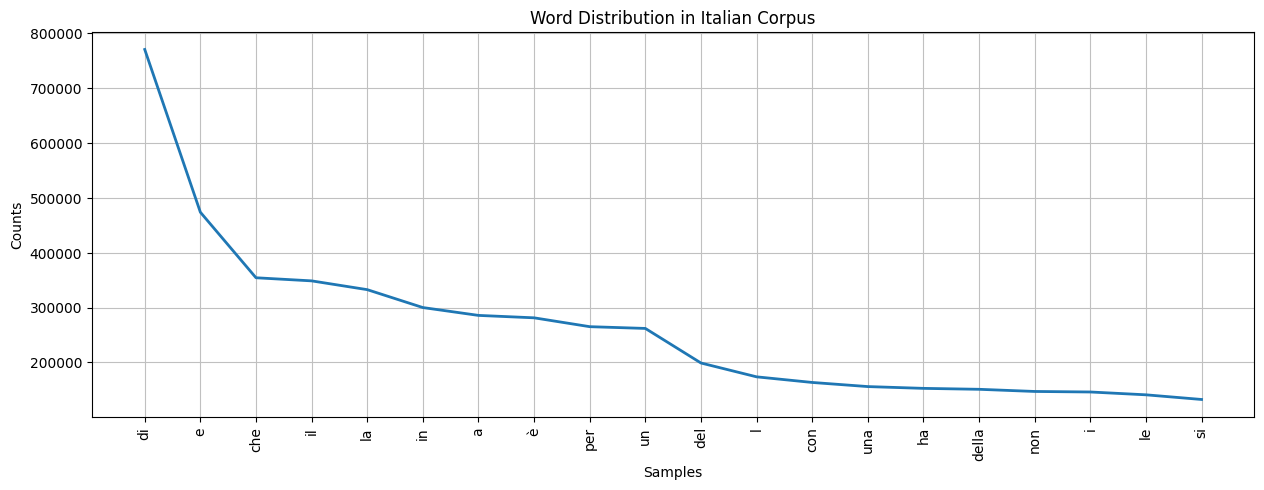

<Axes: title={'center': 'Word Distribution in Italian Corpus'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Count word frequencies
fdist_words = nltk.FreqDist(tokens)

# Print the 20 most common words
print(f"The most common words in the Corpus are: {fdist_words.most_common(20)}")

# Plot the word distribution
plt.figure(figsize=(15, 5))
fdist_words.plot(20, title='Word Distribution in Italian Corpus')

### **Task 7 - Plotting the dispersion plot**

<Figure size 1500x500 with 0 Axes>

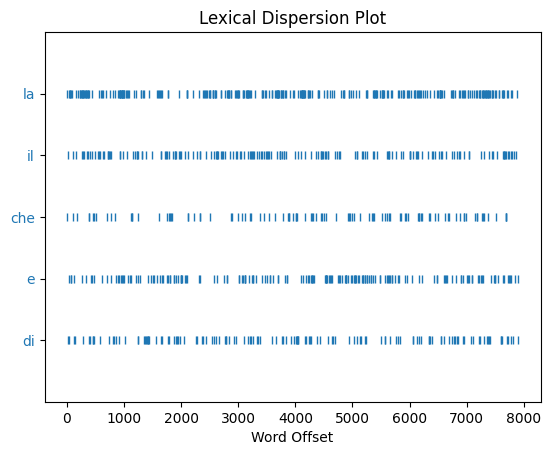

In [ ]:
import matplotlib.pyplot as plt
from nltk.text import Text

slice_index = len(tokens) // 2500

# Slice the tokens
sliced_tokens = tokens[:slice_index]

# Create the Text object
text = Text(sliced_tokens)

# Create the dispersion plot
plt.figure(figsize=(15, 5))
text.dispersion_plot(['di', 'e', 'che', 'il', 'la'])

# Show the plot
plt.show()

For better visibility and understading only a sliced part of the tokens are taken, because the word offset for the whole text goes up to 1e7.

### **Task 8 - Finding the longest word**

In [ ]:
from nltk.tokenize import word_tokenize
longest_words = sorted(tokens, key=len, reverse=True)[:5]

# Print the 5 longest words
print("The 5 longest words in the text are:")
for word in longest_words:
    print(word)

The 5 longest words in the text are:
Llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch
ottomilaquattrocentosessantaquattro
Supercalifragilisticexpialidocious
approvvigionamentodiversificazione
AntidisestablishmentarismoAlmeno


Since the longest word is the name of a village named:    "Llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch".
  
I am gonna use the second longest word which actually has a meaning:
 **"ottomilaquattrocentosessantaquattro"**

#### **Task 8.1 Splitting the longest word into subwords**

In [ ]:
import wordsegment
from wordsegment import load, segment
load()
segment('ottomilaquattrocentosessantaquattro')

['otto', 'mila', 'quattrocento', 'ses', 'santa', 'quattro']

### **Task 9 - Creating a context-free grammar**

The sentence I found was randomly selected from the text file. The sentence is: **"Io non ho giudicato nessuno."**.

The sentence can be found in the line 440836 of the Corpus text file.

In [ ]:
# Define the context-free grammar
grammar = nltk.CFG.fromstring("""
S -> NP VP Punctuation
NP -> Pronoun
VP -> Adv Verb Verb Noun
Pronoun -> 'Io'
Adv -> 'non'
Verb -> 'ho' | 'giudicato'
Noun -> 'nessuno'
Punctuation -> '.'
""")
# Parse the sentence
sentence = "Io non ho giudicato nessuno .".split()
rd_parser = nltk.RecursiveDescentParser(grammar)
for tree in rd_parser.parse(sentence):
    print(tree)

(S
  (NP (Pronoun Io))
  (VP (Adv non) (Verb ho) (Verb giudicato) (Noun nessuno))
  (Punctuation .))


### **Task 10 - Stemming the sentence**

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Initialize the Snowball stemmer for Italian
stemmer = SnowballStemmer("italian")

# Sentence to be stemmed
sentence = "Io non ho giudicato nessuno"

# Tokenize the sentence into words
words = nltk.word_tokenize(sentence, language='italian')

# Stem each word in the sentence
stemmed_words = [stemmer.stem(word) for word in words]

# Print the stemmed words
print(stemmed_words)

['io', 'non', 'ho', 'giudic', 'nessun']


### **Task 11 - Lemmatizing the sentence**

In [ ]:
import spacy

# Load the Italian language model
nlp = spacy.load('it_core_news_sm')

# Sentence to be lemmatized
sentence = "Io non ho giudicato nessuno."

# Process the sentence with spacy
doc = nlp(sentence)

# Lemmatize each word in the sentence
lemmatized_words = [token.lemma_ for token in doc]

# Print the lemmatized words
print(lemmatized_words)

['io', 'non', 'avere', 'giudicare', 'nessuno', '.']


### **Task 12 - Removing stopwords**

In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Download Italian stopwords
nltk.download('stopwords')

# Load Italian stopwords
stop_words = set(stopwords.words('italian'))

# Define the input and output file paths
input_file_path = '/content/drive/My Drive/ita_news_processed.txt'
output_file_path = '/content/drive/My Drive/ita_news_final.txt'

# Read the processed file
with open(input_file_path, 'r', encoding='utf-8') as infile:
    text = infile.read()

# Tokenize the text into words
words = nltk.word_tokenize(text, language='italian')

# Remove stopwords and single-letter words
words = [word for word in words if word.lower() not in stop_words and len(word) > 1]


# Reconstruct the text without stopwords
text_without_stopwords = ' '.join(words)

# Replace multiple whitespaces with a single whitespace
normalized_text = re.sub(r'\s+', ' ', text_without_stopwords)

# Save the final processed text to a new file
with open(output_file_path, 'w', encoding='utf-8') as outfile:
    outfile.write(normalized_text)

In [ ]:
print("First 500 characters of the processed text:")
print(normalized_text[:500])

print("\nLast 500 characters of the processed text:")
print(normalized_text[-500:])

First 500 characters of the processed text:
RBLZ milioni fatto equivale tokenomica favorevole impedisce inflazione favore disabili gravi realizzazione interventi previsti lettera disciplinare approvato DGR sovvenzioni attraverso Fondo erogate SIMEST SPA sette fette formaggio prenotazione fino esaurimento posti acquisto biglietto ingresso ridotto Museo partito Milano ottobre OPEN RAMP TRY WITH US supporto Frisco Shop ore formazione mila euro Lissone riaccendere vetrine città scomode verità storie vere scena Teatro Comunale cibi bene prosta

Last 500 characters of the processed text:
trovare opportunità break anticipato Zw Jackson calcio web raccontare passione pura ZW Soft Zygier stato trovato impiccato cella dicembre Zyxel Networks vanta rivenditori mentre quasi partner certificati suddivisi livelli Ally Silver Gold Eremìa vede cantare calabrese greco arabo fra suoni tradizione innovazioni stato molto gentile sceso me fatto insieme ultimo tratto vergogna cosa insegniamo figli occasione

#### **Task 12.1 - Plotting the word distribution without stopwords**

The most common words in the Corpus are: [('stato', 40945), ('anni', 39280), ('essere', 37935), ('due', 33564), ('prima', 28682), ('dopo', 28167), ('solo', 27965), ('sempre', 27240), ('parte', 24666), ('ancora', 24616), ('stata', 23421), ('molto', 23233), ('fatto', 22585), ('poi', 22473), ('anno', 20578), ('fare', 20421), ('Italia', 19804), ('già', 19739), ('può', 18877), ('tempo', 18809)]


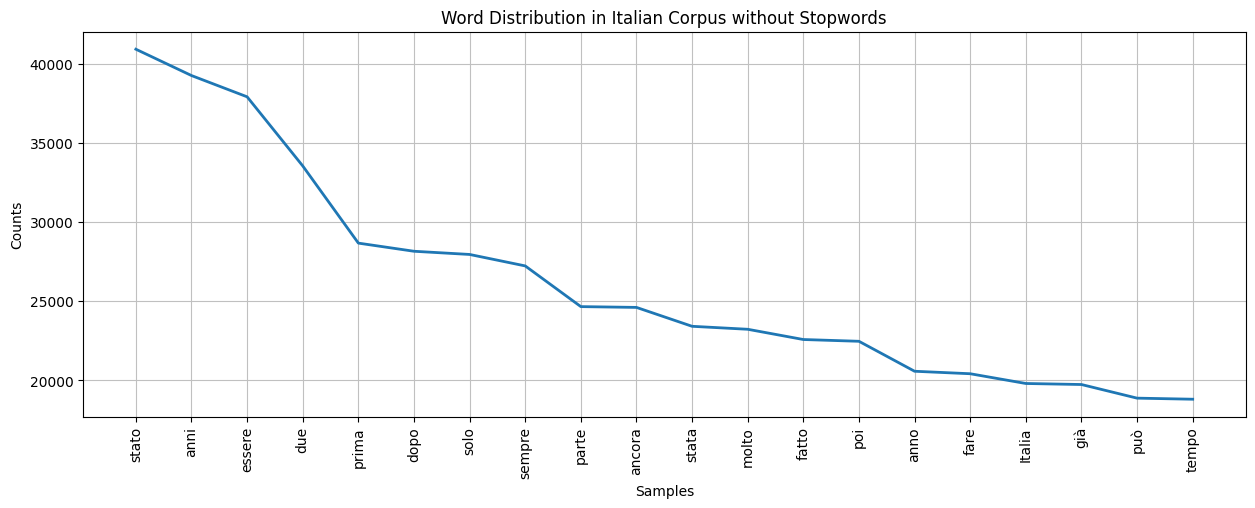

<Axes: title={'center': 'Word Distribution in Italian Corpus without Stopwords'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Count word frequencies
fdist_words2 = nltk.FreqDist(words)

# Print the 20 most common words
print(f"The most common words in the Corpus are: {fdist_words2.most_common(20)}")

# Plot the word distribution
plt.figure(figsize=(15, 5))
fdist_words2.plot(20, title='Word Distribution in Italian Corpus without Stopwords')

#### **Task 12.1 - Plotting the dispersion plot without Stopwords**

<Figure size 1500x500 with 0 Axes>

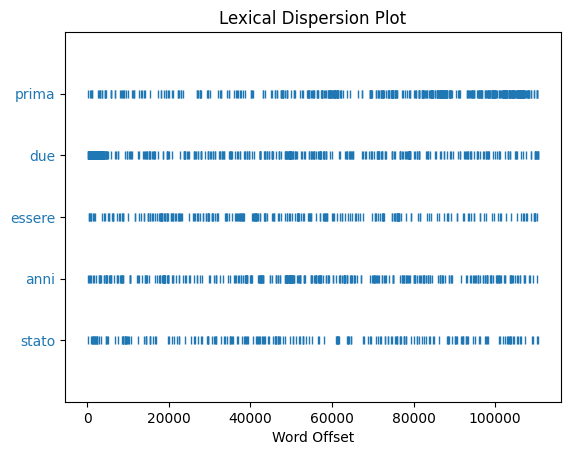

In [ ]:
import matplotlib.pyplot as plt
from nltk.text import Text

slice_index = len(words) // 100

# Slice the tokens
sliced_words = words[:slice_index]

# Create the Text object
text = Text(sliced_words)

# Create the dispersion plot
plt.figure(figsize=(15, 5))
text.dispersion_plot(['stato', 'anni', 'essere', 'due', 'prima'])

### **Task 13 - Wordcloud without Stopwords**

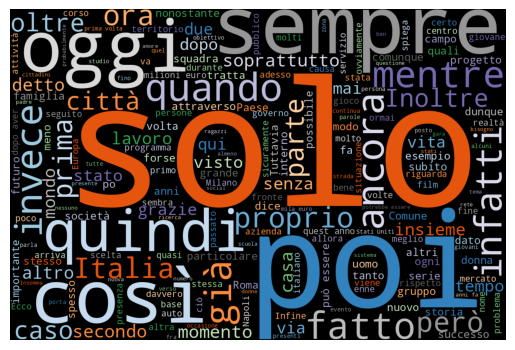

In [ ]:
wc = WordCloud(background_color = 'black', contour_width = 2,
     contour_color = 'black', colormap = 'tab20c_r', width= 1200, height= 800).generate(normalized_text)
plt.axis("off")
plt.imshow(wc)